In [15]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

#df['text'] = (df['Title'] + " " + df['Article']).apply(clean_text)


In [19]:
df1 = pd.read_csv('..//ML/azeri_news.csv')

In [20]:
df1

,Category,Title,News_Article
0,Maraqlı,Naviforce Sport Saat 2016 ilə zövqlərin ahəngi,Naviforce Sport Saat 2016 Yapon Mexanizmi Yapo...
1,Maraqlı,"Sinir ,oynaq , sinir bel ağrılarına 3 gündə son !","ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və ..."
2,Maraqlı,Dəyərindən qat-qat aşağı qiymətə Mənzil,Dəyərindən qat-qat Aşağı Qiymətə. Həzi Aslanov...
3,İdman,2024 və 2028-ci il olimpiadalarının keçiriləcə...,2028-ci il Yay Olimpiya və Paralimpiya Oyunla...
4,Dünya,Türkiyədə zəlzələ,Türkiyədə daha bir zəlzələ meydana gəlib. L...
...,...,...,...
49995,Siyasət,Əli Kərimli terrorçularla da əməkdaşlığa hazır...,"AXCP sədri ""Milli Şura""nın mitinqində qəsdən..."
49996,Siyasət,Elşən Musayev: “Bəlkə elə o terrorist Əli Kəri...,"""Ümumiyyətlə, Milli Şuraya xoş olan, hətta o..."
49997,Dünya,İstanbulda 52 mərtəbəli binada yanğın baş verib,Türkiyənin İstanbul şəhərinin Ataşehir rayon...
49998,Dünya,“Onlar cinayətkarlardır və bir-bir məhv edilir...,Rusiyanı tərk edərək İŞİD sıralarında döyüşə...


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import cosine_distances
import xgboost as xgb

In [31]:
df = pd.read_csv('..//ML/azeri_news.csv')  # Replace with your path
df['text'] = df['Title'] + " " + df['News_Article']
df.dropna(subset=['text', 'Category'], inplace=True)


In [47]:

# Step 1: N-gram TF-IDF Vectorizer (1 to 3-grams)
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X = vectorizer.fit_transform(df['text'])

# Step 2: Encode categories
le = LabelEncoder()
y = le.fit_transform(df['Category'])

# Step 3: Classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=2500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

'''
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Create and train XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1
)

model.fit(X_train_dense, y_train)

# Predict
y_pred = model.predict(X_test_dense)
'''
# Step 4: Report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Dünya       0.83      0.85      0.84      2745
     Maraqlı       0.83      0.81      0.82      3172
  Mədəniyyət       0.82      0.63      0.71       304
     Siyasət       0.84      0.84      0.84      1269
       İdman       0.92      0.94      0.93      1264
İqtisadiyyat       0.84      0.89      0.86      1246

    accuracy                           0.84     10000
   macro avg       0.85      0.82      0.83     10000
weighted avg       0.84      0.84      0.84     10000



C:\Users\ehmed\AppData\Local\Temp\ipykernel_17976\2493961973.py:10: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(distance_matrix, method='ward')


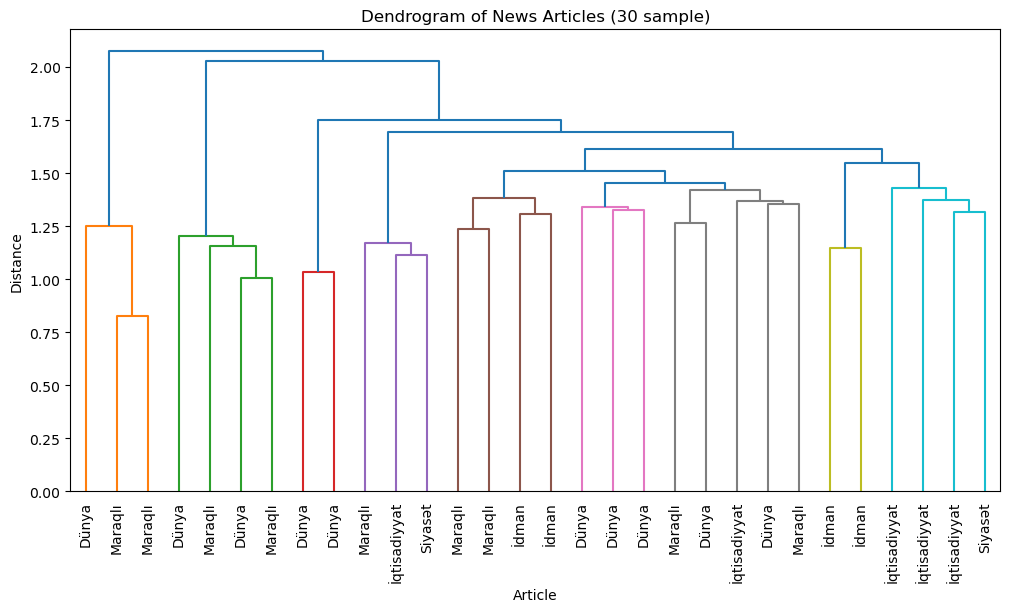

In [35]:
sample_indices = df.sample(30, random_state=42).index
X_sample = X[sample_indices]
labels = df.loc[sample_indices, 'Category'].values

# Calculate distance matrix using cosine distance
distance_matrix = cosine_distances(X_sample)

# Plot dendrogram
plt.figure(figsize=(12, 6))
linkage = sch.linkage(distance_matrix, method='ward')
sch.dendrogram(linkage, labels=labels, leaf_rotation=90)
plt.title("Dendrogram of News Articles (30 sample)")
plt.xlabel("Article")
plt.ylabel("Distance")
plt.show()

In [49]:
import joblib

joblib.dump(clf, "news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [70]:
import joblib
import re

# Load model components
model = joblib.load("news_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-ZəöüğışçƏÖĞÜŞİÇ\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def predict_category(title, article):
    full_text = title + " " + clean_text(article)
    X = vectorizer.transform([full_text])
    pred = model.predict(X)[0]
    category = label_encoder.inverse_transform([pred])[0]
    return category

def chatbot():
    print("📰 Xəbər kateqoriyası Chatbotuna xoş gəlmisiniz! Çıxmaq üçün 'quit' yazın.\n")
    while True:
        title = input("Başlıq: ")
        if title.lower() == 'quit':
            print("Chatbotdan çıxdınız. Sağ olun!")
            break
        article = input("Məqalə: ")
        if article.lower() == 'quit':
            print("Chatbotdan çıxdınız. Sağ olun!")
            break

        category = predict_category(title, article)
        print(f"🤖 Təxmin edilən kateqoriya: {category}\n")

if __name__ == "__main__":
    chatbot()


📰 Xəbər kateqoriyası Chatbotuna xoş gəlmisiniz! Çıxmaq üçün 'quit' yazın.



Başlıq:  Olimpiyanın keçirilməsi
Məqalə:  Yay olimpiya oyunları 2024 2028 oyunları


🤖 Təxmin edilən kateqoriya: İdman



Başlıq:  quit


Chatbotdan çıxdınız. Sağ olun!


In [74]:
df.iloc[49997].text


'İstanbulda 52 mərtəbəli binada yanğın baş verib   Türkiyənin İstanbul şəhərinin Ataşehir rayonunda 52 mərtəbəli binada yanğın baş verib. "Habertürk" yazır ki, yanğın binanın 15-ci mərtəbəsində qeydə alınıb.\xa0Əsasən ofislərin yerləşdiyi binanın aşağı mərtəbəsindəkilər təxliyə olunub. Yanğının havalandırma sistemində qaynaq işləri görülərkən baş verdiyi bildirilir. Hadisə nəticəsində xəsarət alan olmayıb. Yanğının binadakı ağıllı söndürmə sistemi sayəsində qarşısı alındığı deyilir.  '